In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import svm


In [2]:
dataset = pd.read_csv("Rental_Data.csv" )

In [3]:
dataset

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Priyanka,NG2,Nbd_53,40.64749,-73.97237,Private room,11175,1,9,2018-10-19,0.21,6,365
1,2595,2845,Arjun,NG1,Nbd_10,40.75362,-73.98377,Entire home/apt,16875,1,45,2019-05-21,0.38,2,355
2,3647,4632,Aashna,NG1,Nbd_3,40.80902,-73.94190,Private room,11250,3,0,NaN,NaN,1,365
3,3831,4869,Pranav,NG2,Nbd_20,40.68514,-73.95976,Entire home/apt,6675,1,270,2019-07-05,4.64,1,194
4,5022,7192,Rohan,NG1,Nbd_11,40.79851,-73.94399,Entire home/apt,6000,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sanchit,NG2,Nbd_2,40.67853,-73.94995,Private room,5250,2,0,NaN,NaN,2,9
48891,36485057,6570630,Abigail,NG2,Nbd_4,40.70184,-73.93317,Private room,3000,4,0,NaN,NaN,2,36
48892,36485431,23492952,Chandralekha,NG1,Nbd_3,40.81475,-73.94867,Entire home/apt,8625,10,0,NaN,NaN,1,27
48893,36485609,30985759,Manish,NG1,Nbd_6,40.75751,-73.99112,Shared room,4125,1,0,NaN,NaN,6,2


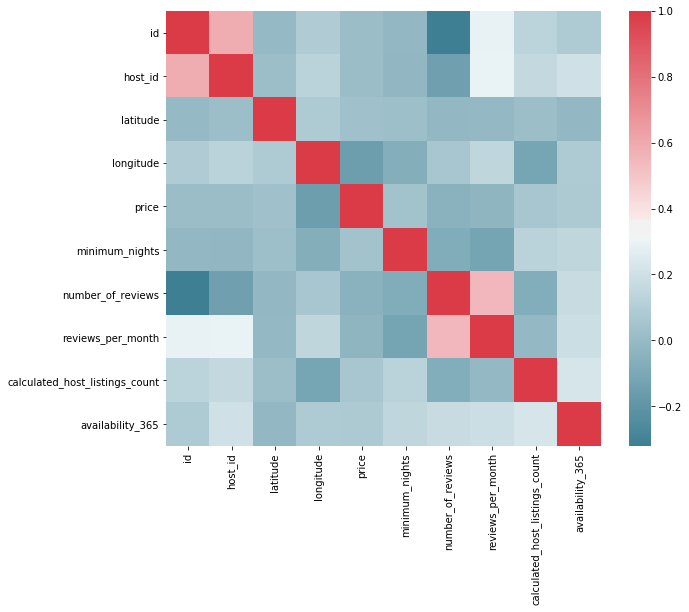

In [4]:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [5]:
data = dataset.copy()

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
data.neighbourhood_group.value_counts()

NG1    21661
NG2    20104
NG3     5666
NG4     1091
NG5      373
Name: neighbourhood_group, dtype: int64

In [8]:
data.neighbourhood_group = data.neighbourhood_group.replace({'NG1':1, 'NG2':2, 'NG3':3, 'NG4':4, 'NG5':5})

In [9]:
data

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Priyanka,2,Nbd_53,40.64749,-73.97237,Private room,11175,1,9,2018-10-19,0.21,6,365
1,2595,2845,Arjun,1,Nbd_10,40.75362,-73.98377,Entire home/apt,16875,1,45,2019-05-21,0.38,2,355
2,3647,4632,Aashna,1,Nbd_3,40.80902,-73.94190,Private room,11250,3,0,NaN,NaN,1,365
3,3831,4869,Pranav,2,Nbd_20,40.68514,-73.95976,Entire home/apt,6675,1,270,2019-07-05,4.64,1,194
4,5022,7192,Rohan,1,Nbd_11,40.79851,-73.94399,Entire home/apt,6000,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sanchit,2,Nbd_2,40.67853,-73.94995,Private room,5250,2,0,NaN,NaN,2,9
48891,36485057,6570630,Abigail,2,Nbd_4,40.70184,-73.93317,Private room,3000,4,0,NaN,NaN,2,36
48892,36485431,23492952,Chandralekha,1,Nbd_3,40.81475,-73.94867,Entire home/apt,8625,10,0,NaN,NaN,1,27
48893,36485609,30985759,Manish,1,Nbd_6,40.75751,-73.99112,Shared room,4125,1,0,NaN,NaN,6,2


In [10]:
data.availability_365.value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

In [11]:
a=data.availability_365<100


In [12]:
data.room_type = data.room_type.replace({'Entire home/apt':0, 'Private room':1, 'Shared room':2})

In [13]:
missing_val_list = data[a == True].index.to_list()
missing_val_list

[4,
 6,
 8,
 10,
 11,
 14,
 15,
 17,
 18,
 20,
 25,
 26,
 27,
 29,
 37,
 40,
 45,
 48,
 55,
 66,
 67,
 72,
 83,
 85,
 87,
 88,
 94,
 95,
 105,
 119,
 123,
 132,
 133,
 135,
 140,
 142,
 143,
 152,
 154,
 160,
 162,
 165,
 166,
 170,
 174,
 179,
 180,
 183,
 184,
 189,
 193,
 194,
 197,
 198,
 210,
 211,
 213,
 214,
 216,
 220,
 221,
 230,
 232,
 234,
 239,
 241,
 243,
 246,
 247,
 248,
 250,
 253,
 255,
 259,
 262,
 267,
 270,
 272,
 273,
 275,
 276,
 279,
 284,
 291,
 295,
 300,
 303,
 310,
 311,
 312,
 315,
 317,
 318,
 321,
 322,
 323,
 327,
 328,
 330,
 331,
 337,
 338,
 339,
 340,
 342,
 344,
 352,
 353,
 357,
 360,
 361,
 362,
 363,
 365,
 373,
 375,
 382,
 389,
 390,
 392,
 393,
 399,
 404,
 405,
 407,
 410,
 411,
 412,
 413,
 415,
 419,
 421,
 423,
 424,
 425,
 426,
 429,
 432,
 434,
 436,
 437,
 442,
 445,
 448,
 450,
 454,
 455,
 458,
 460,
 462,
 467,
 471,
 473,
 474,
 475,
 477,
 478,
 480,
 482,
 483,
 485,
 486,
 487,
 489,
 495,
 496,
 498,
 499,
 501,
 507,
 509,
 511,

In [14]:
data.availability_365[missing_val_list]=0

C:\Users\Aryan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
data

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Priyanka,2,Nbd_53,40.64749,-73.97237,1,11175,1,9,2018-10-19,0.21,6,365
1,2595,2845,Arjun,1,Nbd_10,40.75362,-73.98377,0,16875,1,45,2019-05-21,0.38,2,355
2,3647,4632,Aashna,1,Nbd_3,40.80902,-73.94190,1,11250,3,0,NaN,NaN,1,365
3,3831,4869,Pranav,2,Nbd_20,40.68514,-73.95976,0,6675,1,270,2019-07-05,4.64,1,194
4,5022,7192,Rohan,1,Nbd_11,40.79851,-73.94399,0,6000,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sanchit,2,Nbd_2,40.67853,-73.94995,1,5250,2,0,NaN,NaN,2,0
48891,36485057,6570630,Abigail,2,Nbd_4,40.70184,-73.93317,1,3000,4,0,NaN,NaN,2,0
48892,36485431,23492952,Chandralekha,1,Nbd_3,40.81475,-73.94867,0,8625,10,0,NaN,NaN,1,0
48893,36485609,30985759,Manish,1,Nbd_6,40.75751,-73.99112,2,4125,1,0,NaN,NaN,6,0


In [16]:
b=data.availability_365.between(100,220,inclusive=True)

In [17]:
missing_val_list1 = data[b == True].index.to_list()
missing_val_list1

 

    

[3,
 5,
 7,
 9,
 39,
 46,
 49,
 52,
 59,
 61,
 65,
 70,
 71,
 78,
 81,
 84,
 91,
 92,
 93,
 96,
 100,
 104,
 106,
 109,
 112,
 113,
 116,
 117,
 121,
 126,
 129,
 131,
 136,
 138,
 144,
 145,
 146,
 156,
 159,
 161,
 163,
 172,
 191,
 192,
 202,
 208,
 209,
 215,
 223,
 240,
 245,
 269,
 278,
 287,
 290,
 301,
 302,
 306,
 308,
 313,
 319,
 320,
 324,
 326,
 329,
 332,
 335,
 336,
 341,
 343,
 350,
 355,
 356,
 358,
 370,
 372,
 374,
 379,
 384,
 395,
 398,
 402,
 403,
 406,
 408,
 427,
 446,
 453,
 461,
 468,
 469,
 479,
 488,
 497,
 500,
 504,
 505,
 517,
 525,
 532,
 541,
 550,
 553,
 571,
 572,
 577,
 578,
 579,
 580,
 584,
 599,
 607,
 613,
 619,
 620,
 623,
 624,
 643,
 667,
 693,
 695,
 697,
 703,
 706,
 721,
 722,
 731,
 739,
 743,
 747,
 757,
 761,
 788,
 792,
 797,
 806,
 812,
 816,
 817,
 818,
 822,
 852,
 854,
 856,
 859,
 876,
 878,
 879,
 893,
 902,
 903,
 906,
 915,
 921,
 924,
 937,
 941,
 942,
 943,
 947,
 953,
 956,
 978,
 979,
 980,
 982,
 996,
 997,
 999,
 1000,
 10

In [18]:
data.availability_365[missing_val_list1]=1

C:\Users\Aryan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
data

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Priyanka,2,Nbd_53,40.64749,-73.97237,1,11175,1,9,2018-10-19,0.21,6,365
1,2595,2845,Arjun,1,Nbd_10,40.75362,-73.98377,0,16875,1,45,2019-05-21,0.38,2,355
2,3647,4632,Aashna,1,Nbd_3,40.80902,-73.94190,1,11250,3,0,NaN,NaN,1,365
3,3831,4869,Pranav,2,Nbd_20,40.68514,-73.95976,0,6675,1,270,2019-07-05,4.64,1,1
4,5022,7192,Rohan,1,Nbd_11,40.79851,-73.94399,0,6000,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sanchit,2,Nbd_2,40.67853,-73.94995,1,5250,2,0,NaN,NaN,2,0
48891,36485057,6570630,Abigail,2,Nbd_4,40.70184,-73.93317,1,3000,4,0,NaN,NaN,2,0
48892,36485431,23492952,Chandralekha,1,Nbd_3,40.81475,-73.94867,0,8625,10,0,NaN,NaN,1,0
48893,36485609,30985759,Manish,1,Nbd_6,40.75751,-73.99112,2,4125,1,0,NaN,NaN,6,0


In [20]:
c=data.availability_365>220

In [21]:
missing_val_list2 = data[c == True].index.to_list()
missing_val_list2


[0,
 1,
 2,
 12,
 13,
 16,
 19,
 21,
 22,
 23,
 24,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 41,
 42,
 43,
 44,
 47,
 50,
 51,
 53,
 54,
 56,
 57,
 58,
 60,
 62,
 63,
 64,
 68,
 69,
 73,
 74,
 75,
 76,
 77,
 79,
 80,
 82,
 86,
 89,
 90,
 97,
 98,
 99,
 101,
 102,
 103,
 107,
 108,
 110,
 111,
 114,
 115,
 118,
 120,
 122,
 124,
 125,
 127,
 128,
 130,
 134,
 137,
 139,
 141,
 147,
 148,
 149,
 150,
 151,
 153,
 155,
 157,
 158,
 164,
 167,
 168,
 169,
 171,
 173,
 175,
 176,
 177,
 178,
 181,
 182,
 185,
 186,
 187,
 188,
 190,
 195,
 196,
 199,
 200,
 201,
 203,
 204,
 205,
 206,
 207,
 212,
 217,
 218,
 219,
 222,
 224,
 225,
 226,
 227,
 228,
 229,
 231,
 233,
 235,
 236,
 237,
 238,
 242,
 244,
 249,
 251,
 252,
 254,
 256,
 257,
 258,
 260,
 261,
 263,
 264,
 265,
 266,
 268,
 271,
 274,
 277,
 280,
 281,
 282,
 283,
 285,
 286,
 288,
 289,
 292,
 293,
 294,
 296,
 297,
 298,
 299,
 304,
 305,
 307,
 309,
 314,
 316,
 325,
 333,
 334,
 345,
 346,
 347,
 348,
 349,
 351,
 354,

In [22]:
data.availability_365[missing_val_list2]=2

C:\Users\Aryan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Priyanka,2,Nbd_53,40.64749,-73.97237,1,11175,1,9,2018-10-19,0.21,6,2
1,2595,2845,Arjun,1,Nbd_10,40.75362,-73.98377,0,16875,1,45,2019-05-21,0.38,2,2
2,3647,4632,Aashna,1,Nbd_3,40.80902,-73.94190,1,11250,3,0,NaN,NaN,1,2
3,3831,4869,Pranav,2,Nbd_20,40.68514,-73.95976,0,6675,1,270,2019-07-05,4.64,1,1
4,5022,7192,Rohan,1,Nbd_11,40.79851,-73.94399,0,6000,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sanchit,2,Nbd_2,40.67853,-73.94995,1,5250,2,0,NaN,NaN,2,0
48891,36485057,6570630,Abigail,2,Nbd_4,40.70184,-73.93317,1,3000,4,0,NaN,NaN,2,0
48892,36485431,23492952,Chandralekha,1,Nbd_3,40.81475,-73.94867,0,8625,10,0,NaN,NaN,1,0
48893,36485609,30985759,Manish,1,Nbd_6,40.75751,-73.99112,2,4125,1,0,NaN,NaN,6,0


In [24]:
X = data[['neighbourhood_group' , 'latitude' , 'longitude' , 'room_type' , 'price' , 'minimum_nights']]
Y = data[data.columns[14]]
print(X,Y)

       neighbourhood_group  latitude  longitude  room_type  price  \
0                        2  40.64749  -73.97237          1  11175   
1                        1  40.75362  -73.98377          0  16875   
2                        1  40.80902  -73.94190          1  11250   
3                        2  40.68514  -73.95976          0   6675   
4                        1  40.79851  -73.94399          0   6000   
...                    ...       ...        ...        ...    ...   
48890                    2  40.67853  -73.94995          1   5250   
48891                    2  40.70184  -73.93317          1   3000   
48892                    1  40.81475  -73.94867          0   8625   
48893                    1  40.75751  -73.99112          2   4125   
48894                    1  40.76404  -73.98933          1   6750   

       minimum_nights  
0                   1  
1                   1  
2                   3  
3                   1  
4                  10  
...               ...  
488

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
y_pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
cnf_mt = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('Confusion Matrix:\n', cnf_mt, '\n\nAccuracy: ', acc)

Confusion Matrix:
 [[7735  415  722]
 [1421  195  326]
 [2386  269 1200]] 

Accuracy:  0.6224009816620083


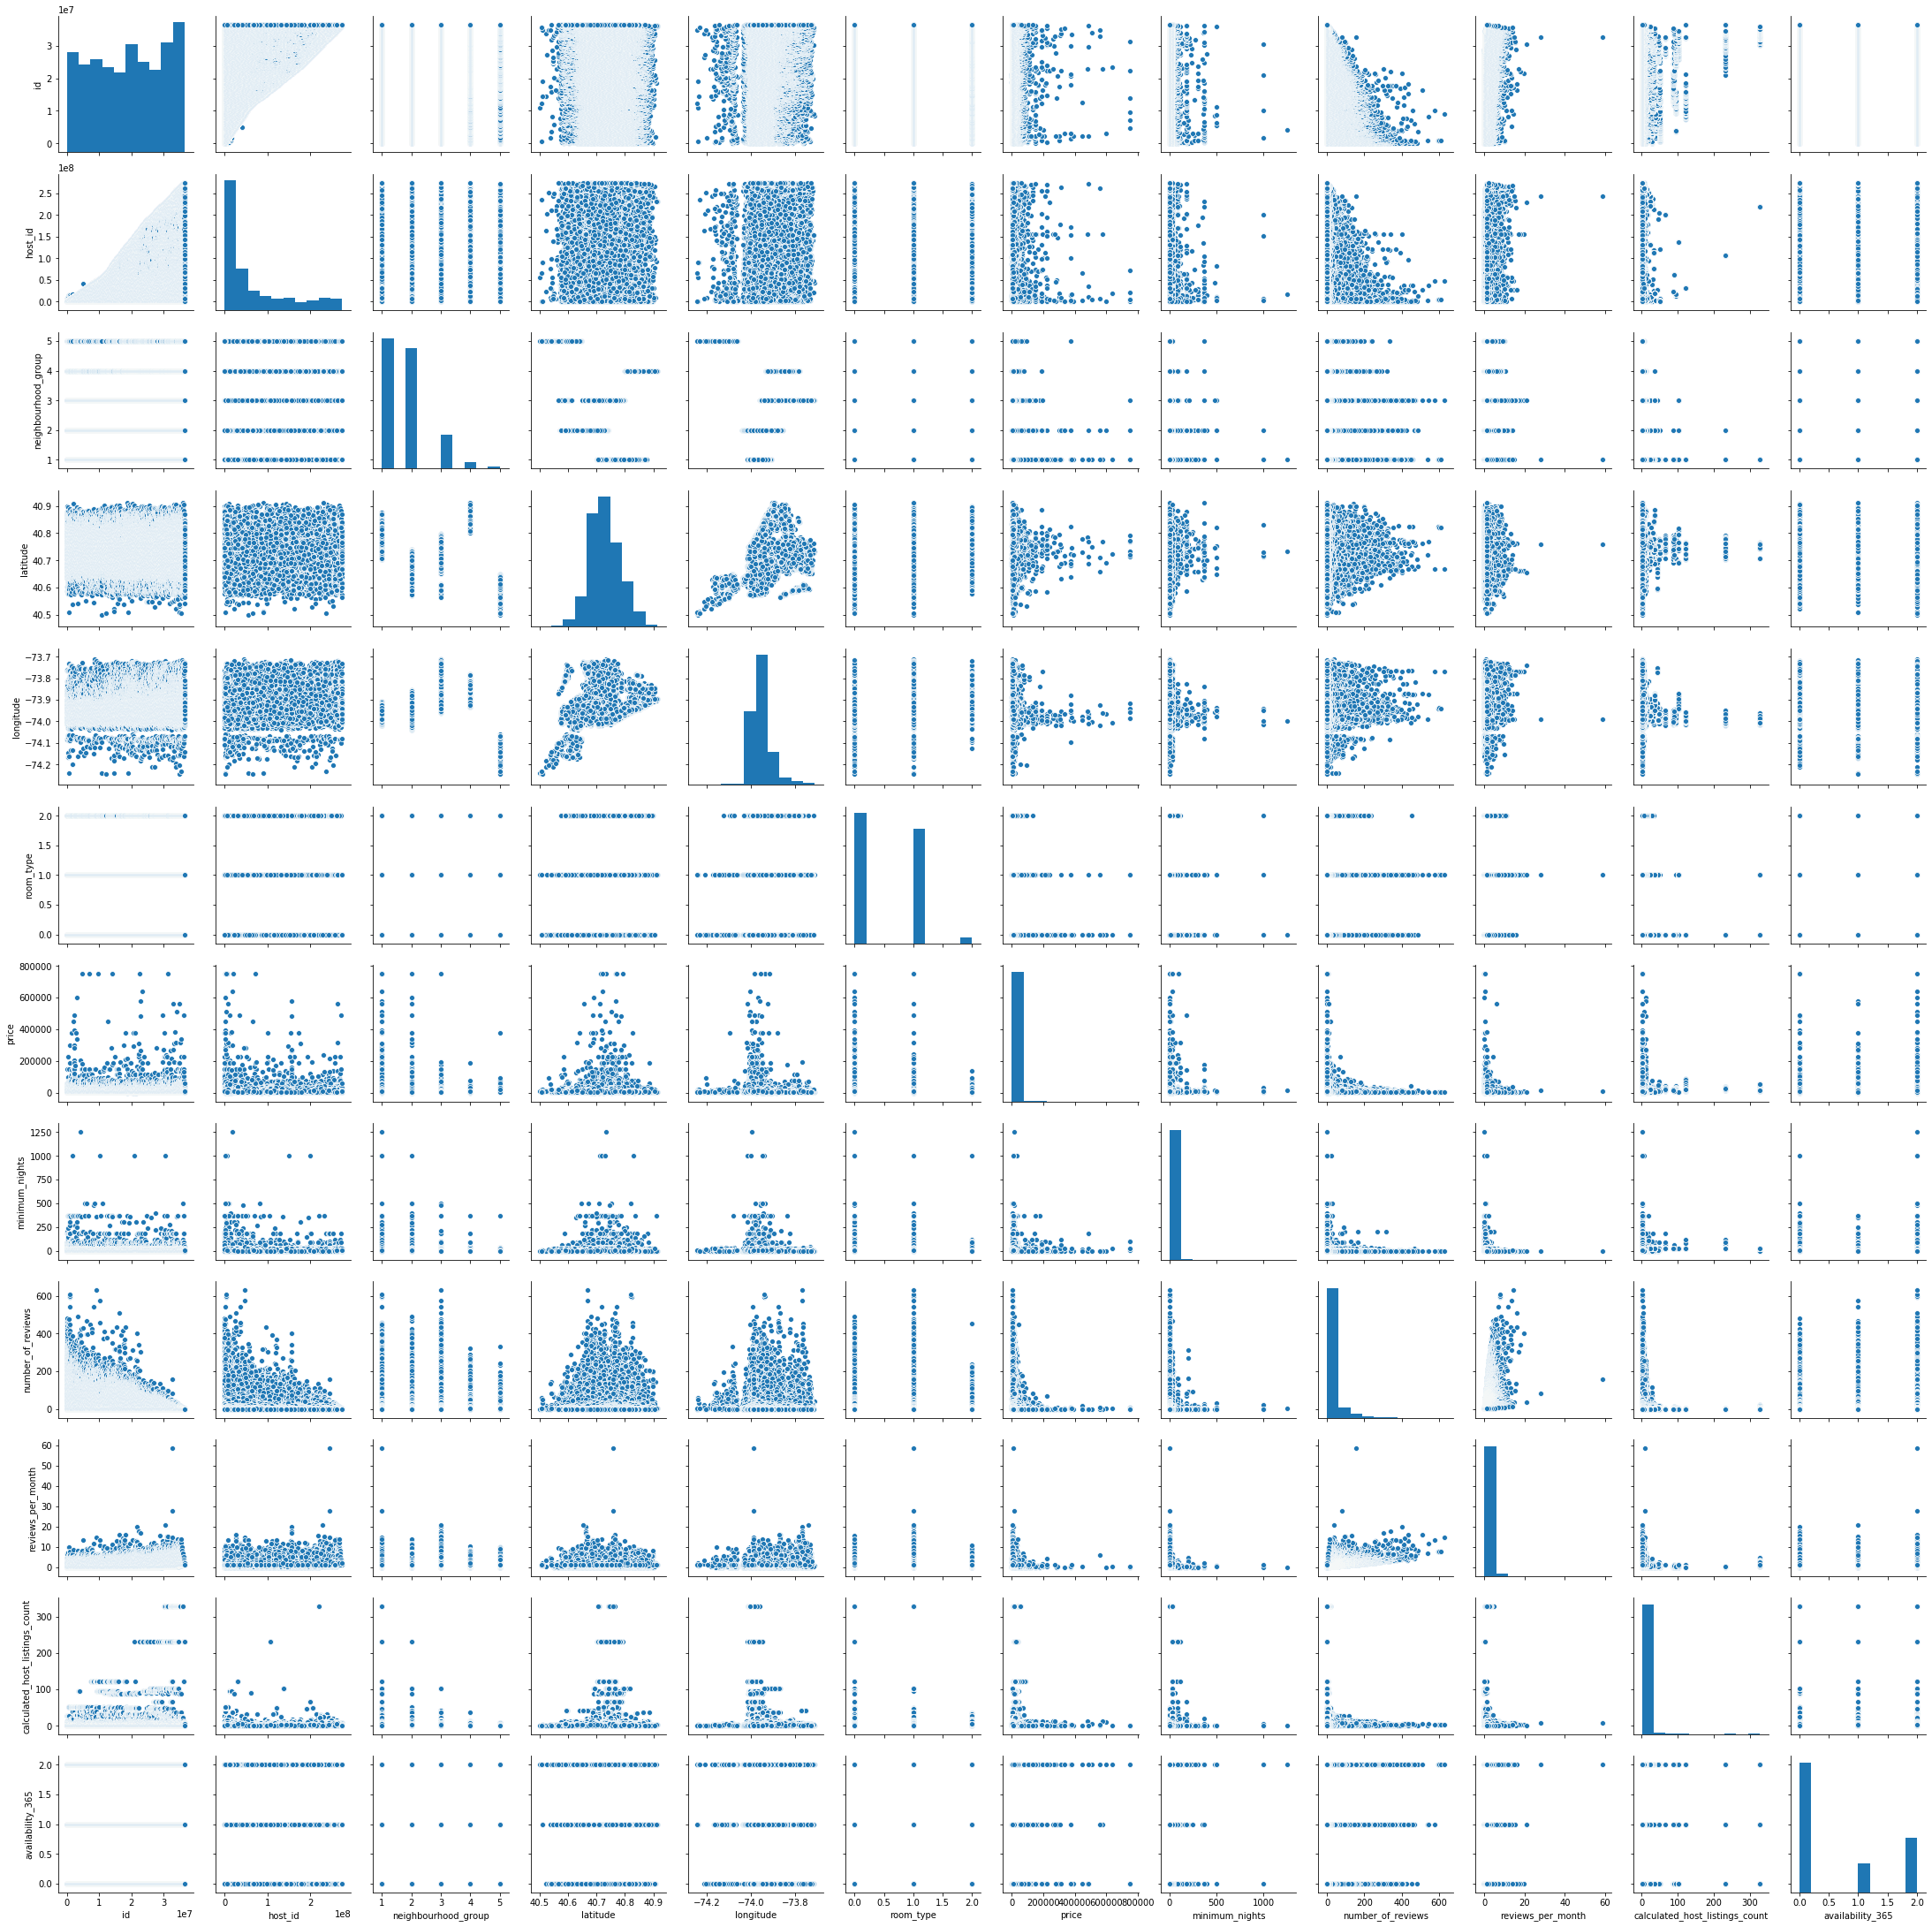

In [32]:
sns.pairplot(data)

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

In [34]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
co_df = pd.DataFrame(data = lr.coef_,index = X.columns, columns = ['Coefficient'])
co_df

,Coefficient
neighbourhood_group,0.050506
latitude,-0.151305
longitude,1.172210
room_type,0.023851
price,0.000004
minimum_nights,0.005892


In [38]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted Values')

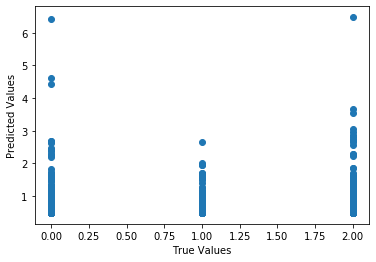

In [39]:
plt.scatter(y_test,predictions) # check how the predictions are related to each other
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
#Create a  Classifier
clf_r=RandomForestClassifier(n_estimators=1000,criterion='entropy',max_features=4)# both parameter have good influence in performance

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_r.fit(X_train,y_train)

pred_class_r=clf_r.predict(X_test)
accuracy_r=len(np.where(y_test==pred_class_r)[0])/len(y_test)
print('accuracy =',accuracy_r)

accuracy = 0.6627581975594792
